In [4]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
train_dataset = load_dataset('train.csv')
train_data = train_dataset.values

test_dataset = load_dataset('test.csv')
test_data = test_dataset.values

In [5]:
train_dataset

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi service  \
0       Eco Plus              460                      3   
1       Business              235                      3   
2       Business             1142                      2   
3       Business              562                      2   
4       Business              214                      3   
...          ...              ...                    ...   
103899       Eco              192                      2   
103900  Business             2347                      4   
103901  Business             1995                      1   
103902       Eco             1000                      1   
103903  Business             1723                      1   

        Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                       4  ...                       5   
1                                       2  ...                       1   
2                                       2  ...                       5   
3                                       5  ...                       2   
4                                       3  ...                       3   
...                                   ...  ...                     ...   
103899                                  1  ...                       2   
103900                                  4  ...                       5   
103901                                  1  ...                       4   
103902                                  1  ...                       1   
103903                                  3  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
0                      5            5                          25   
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   
4                      3            3                           0   
...                  ...          ...                         

In [6]:
# Anem a veure quants valors nul tenim al train
print("Per comptar el nombre de valors no existents:")
print(train_dataset.isnull().sum())

Per comptar el nombre de valors no existents:
Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Del

In [7]:
# Veiem que tenim 310 nuls de 103904 a 'Arrival Delay in Minutes'. El que faré és eliminar aquestes dades, ja que són molt poques comparant amb el total 
train_dataset = train_dataset.dropna().copy()

In [8]:
# Anem a veure quants valors nul tenim al test
print("Per comptar el nombre de valors no existents:")
print(test_dataset.isnull().sum())

Per comptar el nombre de valors no existents:
Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes          

In [9]:
# Veiem que tenim 83 nuls de 25976 a 'Arrival Delay in Minutes'. El que faré és eliminar aquestes dades, ja que són molt poques comparant amb el total  
test_dataset = test_dataset.dropna().copy()

In [10]:
# Anem a veure com es distribueixen les dades
import plotly.express as px
fig= px.sunburst(train_dataset, path=['Customer Type','Type of Travel','satisfaction','Class'], values='Flight Distance',color='Age')
fig.show()

In [11]:
# Veiem que la majoria de "Disloyal Costumers" és gent jove, tots viatgen per treball, i molt pocs estan satisfets
# Per la gent que viatge per viatges personals, veiem que molts voten "neutral or dissatisfaied", peròi casi tots viatgen amb classe econòmica
# Molts dels "loyal Costumers" que viatgen per treball estan satisfets

In [12]:
# Mirem de quin tipus són els atributs
print("Per visualitzar informació de la BBDD:")
train_dataset.info()

Per visualitzar informació de la BBDD:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Gender                             103594 non-null  object 
 3   Customer Type                      103594 non-null  object 
 4   Age                                103594 non-null  int64  
 5   Type of Travel                     103594 non-null  object 
 6   Class                              103594 non-null  object 
 7   Flight Distance                    103594 non-null  int64  
 8   Inflight wifi service              103594 non-null  int64  
 9   Departure/Arrival time convenient  103594 non-null  int64  
 10  Ease of Online booking             103594 non-null  int64  
 11  

In [13]:
# Convertim els atributs de tipus 'objecte' en números (del train_dataset i del test_dataset) 

cnt_gender = train_dataset['Gender'].value_counts().to_frame()
cnt_customer_type = train_dataset["Customer Type"].value_counts().to_frame()
cnt_type_travel = train_dataset['Type of Travel'].value_counts().to_frame()
cnt_class = train_dataset["Class"].value_counts().to_frame()
cnt_satisfaction = train_dataset['satisfaction'].value_counts().to_frame()
from sklearn.preprocessing import  LabelEncoder
le=LabelEncoder()
train_dataset.iloc[:,2] = le.fit_transform(train_dataset.iloc[:,2])
train_dataset.iloc[:,3] = le.fit_transform(train_dataset.iloc[:,3])
train_dataset.iloc[:,5] = le.fit_transform(train_dataset.iloc[:,5])
train_dataset.iloc[:,6] = le.fit_transform(train_dataset.iloc[:,6])
train_dataset.iloc[:,24] = le.fit_transform(train_dataset.iloc[:,24])

train_data = train_dataset.values

cnt_gender = test_dataset['Gender'].value_counts().to_frame()
cnt_customer_type = test_dataset["Customer Type"].value_counts().to_frame()
cnt_type_travel = test_dataset['Type of Travel'].value_counts().to_frame()
cnt_class = test_dataset["Class"].value_counts().to_frame()
cnt_satisfaction = test_dataset['satisfaction'].value_counts().to_frame()
from sklearn.preprocessing import  LabelEncoder
le=LabelEncoder()
test_dataset.iloc[:,2] = le.fit_transform(test_dataset.iloc[:,2])
test_dataset.iloc[:,3] = le.fit_transform(test_dataset.iloc[:,3])
test_dataset.iloc[:,5] = le.fit_transform(test_dataset.iloc[:,5])
test_dataset.iloc[:,6] = le.fit_transform(test_dataset.iloc[:,6])
test_dataset.iloc[:,24] = le.fit_transform(test_dataset.iloc[:,24])

test_data = test_dataset.values

In [14]:
# Eliminar les columnes "Unnamed: 0" i "id" del dataset del train i del test, ja que no ens aporten res
train_dataset.drop("Unnamed: 0",axis=1,inplace=True)
train_dataset.drop("id",axis=1,inplace=True)
test_dataset.drop("Unnamed: 0",axis=1,inplace=True)
test_dataset.drop("id",axis=1,inplace=True)

In [15]:
train_dataset

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0            1              0   13               1      2              460   
1            1              1   25               0      0              235   
2            0              0   26               0      0             1142   
3            0              0   25               0      0              562   
4            1              0   61               0      0              214   
...        ...            ...  ...             ...    ...              ...   
103899       0              1   23               0      1              192   
103900       1              0   49               0      0             2347   
103901       1              1   30               0      0             1995   
103902       0              1   22               0      1             1000   
103903       1              0   27               0      0             1723   

        Inflight wifi service  Departure/Arrival time convenient  \
0                           3                                  4   
1                           3                                  2   
2                           2                                  2   
3                           2                                  5   
4                           3                                  3   
...                       ...                                ...   
103899                      2                                  1   
103900                      4                                  4   
103901                      1                                  1   
103902                      1                                  1   
103903                      1                                  3   

        Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                            3              1  ...                       5   
1                            3              3  ...                       1   
2                            2              2  ...                       5   
3                            5              5  ...                       2   
4                            3              3  ...                       3   
...                        ...            ...  ...                     ...   
103899                       2              3  ...                       2   
103900                       4              4  ...                       5   
103901                       1              3  ...                       4   
103902                       1              5  ...                       1   
103903                       3              3  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
0                      5            5                          25   
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   

In [16]:
# Defineixo els atributs dependents (X) i els atributs independents (Y)
x_train = train_data[:, :-1]
y_train = train_data[:, -1] 

print("Dimensionalitat de la BBDD de train:", train_dataset.shape) #shape of the data
print("Dimensionalitat de les entrades X de train", x_train.shape)
print("Dimensionalitat de l'atribut Y de train", y_train.shape)
print(" ")

x_test = test_data[:, :-1]
y_test = test_data[:, -1] 

print("Dimensionalitat de la BBDD de test:", test_dataset.shape) #shape of the data
print("Dimensionalitat de les entrades X de test", x_test.shape)
print("Dimensionalitat de l'atribut Y de test", y_test.shape)

Dimensionalitat de la BBDD de train: (103594, 23)
Dimensionalitat de les entrades X de train (103594, 24)
Dimensionalitat de l'atribut Y de train (103594,)
 
Dimensionalitat de la BBDD de test: (25893, 23)
Dimensionalitat de les entrades X de test (25893, 24)
Dimensionalitat de l'atribut Y de test (25893,)


In [17]:
print("Per visualitzar les primeres 5 mostres de la BBDD de train:")
train_dataset.head() 

Per visualitzar les primeres 5 mostres de la BBDD de train:


Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       1              0   13               1      2              460   
1       1              1   25               0      0              235   
2       0              0   26               0      0             1142   
3       0              0   25               0      0              562   
4       1              0   61               0      0              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              1  ...                       5   
1                       3              3  ...                       1   
2                       2              2  ...                       5   
3                       5              5  ...                       2   
4                       3              3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes  satisfaction  
0                    18.000             0  
1                     6.000             0  
2                     0.000             1  
3                     9.000             0  
4                     0.000             1  

[5 rows x 23 columns]

In [18]:
print("Per visualitzar les primeres 5 mostres de la BBDD de test:")
test_dataset.head() 

Per visualitzar les primeres 5 mostres de la BBDD de test:


Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       0              0   52               0      1              160   
1       0              0   36               0      0             2863   
2       1              1   20               0      1              192   
3       1              0   44               0      0             3377   
4       0              0   49               0      1             1182   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      5                                  4   
1                      1                                  1   
2                      2                                  0   
3                      0                                  0   
4                      2                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              4  ...                       5   
1                       3              1  ...                       4   
2                       2              4  ...                       2   
3                       0              2  ...                       1   
4                       4              3  ...                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 5                 5                 5                2   
1                 4                 4                 4                3   
2                 4                 1                 3                2   
3                 1                 1                 1                3   
4                 2                 2                 2                4   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          50   
1                 4            5                           0   
2                 2            2                           0   
3                 1            4                           0   
4                 2            4                           0   

   Arrival Delay in Minutes  satisfaction  
0                    44.000             1  
1                     0.000             1  
2                     0.000             0  
3                     6.000             1  
4                    20.000             1  

[5 rows x 23 columns]

In [19]:
print("Per visualitzar informació de la BBDD de train:")
train_dataset.info()

Per visualitzar informació de la BBDD de train:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  int32  
 1   Customer Type                      103594 non-null  int32  
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  int32  
 4   Class                              103594 non-null  int32  
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int6

In [20]:
print("Per visualitzar informació de la BBDD de test:")
test_dataset.info()

Per visualitzar informació de la BBDD de test:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25893 non-null  int32  
 1   Customer Type                      25893 non-null  int32  
 2   Age                                25893 non-null  int64  
 3   Type of Travel                     25893 non-null  int32  
 4   Class                              25893 non-null  int32  
 5   Flight Distance                    25893 non-null  int64  
 6   Inflight wifi service              25893 non-null  int64  
 7   Departure/Arrival time convenient  25893 non-null  int64  
 8   Ease of Online booking             25893 non-null  int64  
 9   Gate location                      25893 non-null  int64  
 10  Food and drink                     25893 non-null  int64  
 11  Online 

In [21]:
print("Per veure estadístiques dels atributs numèrics de la BBDD de train:")
train_dataset.describe()

Per veure estadístiques dels atributs numèrics de la BBDD de train:


Gender  Customer Type        Age  Type of Travel      Class  \
count 103594.000     103594.000 103594.000      103594.000 103594.000   
mean       0.492          0.183     39.380           0.310      0.594   
std        0.500          0.386     15.113           0.463      0.621   
min        0.000          0.000      7.000           0.000      0.000   
25%        0.000          0.000     27.000           0.000      0.000   
50%        0.000          0.000     40.000           0.000      1.000   
75%        1.000          0.000     51.000           1.000      1.000   
max        1.000          1.000     85.000           1.000      2.000   

       Flight Distance  Inflight wifi service  \
count       103594.000             103594.000   
mean          1189.325                  2.730   
std            997.297                  1.328   
min             31.000                  0.000   
25%            414.000                  2.000   
50%            842.000                  3.000   
75%           1743.000                  4.000   
max           4983.000                  5.000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                         103594.000              103594.000   
mean                               3.060                   2.757   
std                                1.525                   1.399   
min                                0.000                   0.000   
25%                                2.000                   2.000   
50%                                3.000                   3.000   
75%                                4.000                   4.000   
max                                5.000                   5.000   

       Gate location  ...  Inflight entertainment  On-board service  \
count     103594.000  ...              103594.000        103594.000   
mean           2.977  ...                   3.358             3.383   
std            1.278  ...                   1.333             1.288   
min            0.000  ...                   0.000             0.000   
25%            2.000  ...                   2.000             2.000   
50%            3.000  ...                   4.000             4.000   
75%            4.000  ...                   4.000             4.000   
max            5.000  ...                   5.000             5.000   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count        103594.000        103594.000       103594.000        103594.000   
mean              3.351             3.632            3.304             3.641   
std               1.315             1.181            1.265             1.176   
min               0.000             1.000            0.000             0.000   
25%               2.000             3.000            3.000             3.000   
50%               4.000             4.000            3.000             4.000   
75%               4.000             5.000            4.000             5.000   
max               5.000             5.000            5.000             5.000   

       Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
count   103594.000                  103594.000                103594.000   
mean         3.286                      14.748                    15.179   
std          1.312                      38.117                    38.699   
min          0.000                       0.000                     0.000   
25%          2.000                       0.000                     0.000   
50%          3.000                       0.000                     0.000   
75%          4.000                      12.000                    13.000   
max          5.000                    1592.000                  1584.000   

       satisfaction  
count    103594.000  
mean          0.433  
std           0.496  
min           0.000  
25%           0.000  
50%           0.000  
75%           1.000  
max           1.000  

[8 rows x 23 columns]

In [22]:
# El màxim del "Departure Delay in Minutes" és molt gran (1592 minuts)
# El màxim del "Arrival Delay in Minutes" també és molt gran (1584 minuts)
# Anem a veure si aquest valors són normals, o si són casos puntuals. Ho farem a través de boxplots

In [23]:
departure = sns.boxplot(x=train_dataset['Departure Delay in Minutes'])
departure

NameError: name 'sns' is not defined

In [ ]:
arrival = sns.boxplot(x=train_dataset['Arrival Delay in Minutes'])
arrival

In [24]:
# Veiem que, efectivament, aquests valors pertanyen a outliers.
# Com que el nostre dataset és molt gran i no volem que aquests outliers ens esbiaixin el nostre dataset, els eliminem
outliers = train_dataset[train_dataset['Arrival Delay in Minutes'] > 1250].index
train_dataset.drop(outliers, inplace=True)

In [25]:
print("Per veure estadístiques dels atributs numèrics de la BBDD de test:")
test_dataset.describe()

Per veure estadístiques dels atributs numèrics de la BBDD de test:


Gender  Customer Type       Age  Type of Travel     Class  \
count 25893.000      25893.000 25893.000       25893.000 25893.000   
mean      0.493          0.185    39.622           0.306     0.593   
std       0.500          0.388    15.134           0.461     0.624   
min       0.000          0.000     7.000           0.000     0.000   
25%       0.000          0.000    27.000           0.000     0.000   
50%       0.000          0.000    40.000           0.000     1.000   
75%       1.000          0.000    51.000           1.000     1.000   
max       1.000          1.000    85.000           1.000     2.000   

       Flight Distance  Inflight wifi service  \
count        25893.000              25893.000   
mean          1193.753                  2.724   
std            998.627                  1.335   
min             31.000                  0.000   
25%            414.000                  2.000   
50%            849.000                  3.000   
75%           1744.000                  4.000   
max           4983.000                  5.000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                          25893.000               25893.000   
mean                               3.046                   2.756   
std                                1.533                   1.413   
min                                0.000                   0.000   
25%                                2.000                   2.000   
50%                                3.000                   3.000   
75%                                4.000                   4.000   
max                                5.000                   5.000   

       Gate location  ...  Inflight entertainment  On-board service  \
count      25893.000  ...               25893.000         25893.000   
mean           2.976  ...                   3.357             3.386   
std            1.282  ...                   1.339             1.282   
min            1.000  ...                   0.000             0.000   
25%            2.000  ...                   2.000             2.000   
50%            3.000  ...                   4.000             4.000   
75%            4.000  ...                   4.000             4.000   
max            5.000  ...                   5.000             5.000   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count         25893.000         25893.000        25893.000         25893.000   
mean              3.350             3.633            3.314             3.649   
std               1.319             1.176            1.269             1.181   
min               0.000             1.000            1.000             0.000   
25%               2.000             3.000            3.000             3.000   
50%               4.000             4.000            3.000             4.000   
75%               4.000             5.000            4.000             5.000   
max               5.000             5.000            5.000             5.000   

       Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
count    25893.000                   25893.000                 25893.000   
mean         3.286                      14.225                    14.741   
std          1.319                      37.186                    37.518   
min          0.000                       0.000                     0.000   
25%          2.000                       0.000                     0.000   
50%          3.000                       0.000                     0.000   
75%          4.000                      12.000                    13.000   
max          5.000                    1128.000                  1115.000   

       satisfaction  
count     25893.000  
mean          0.439  
std           0.496  
min           0.000  
25%           0.000  
50%           0.000  
75%           1.000  
max           1.000  

[8 rows x 23 columns]

<IPython.core.display.Javascript object>


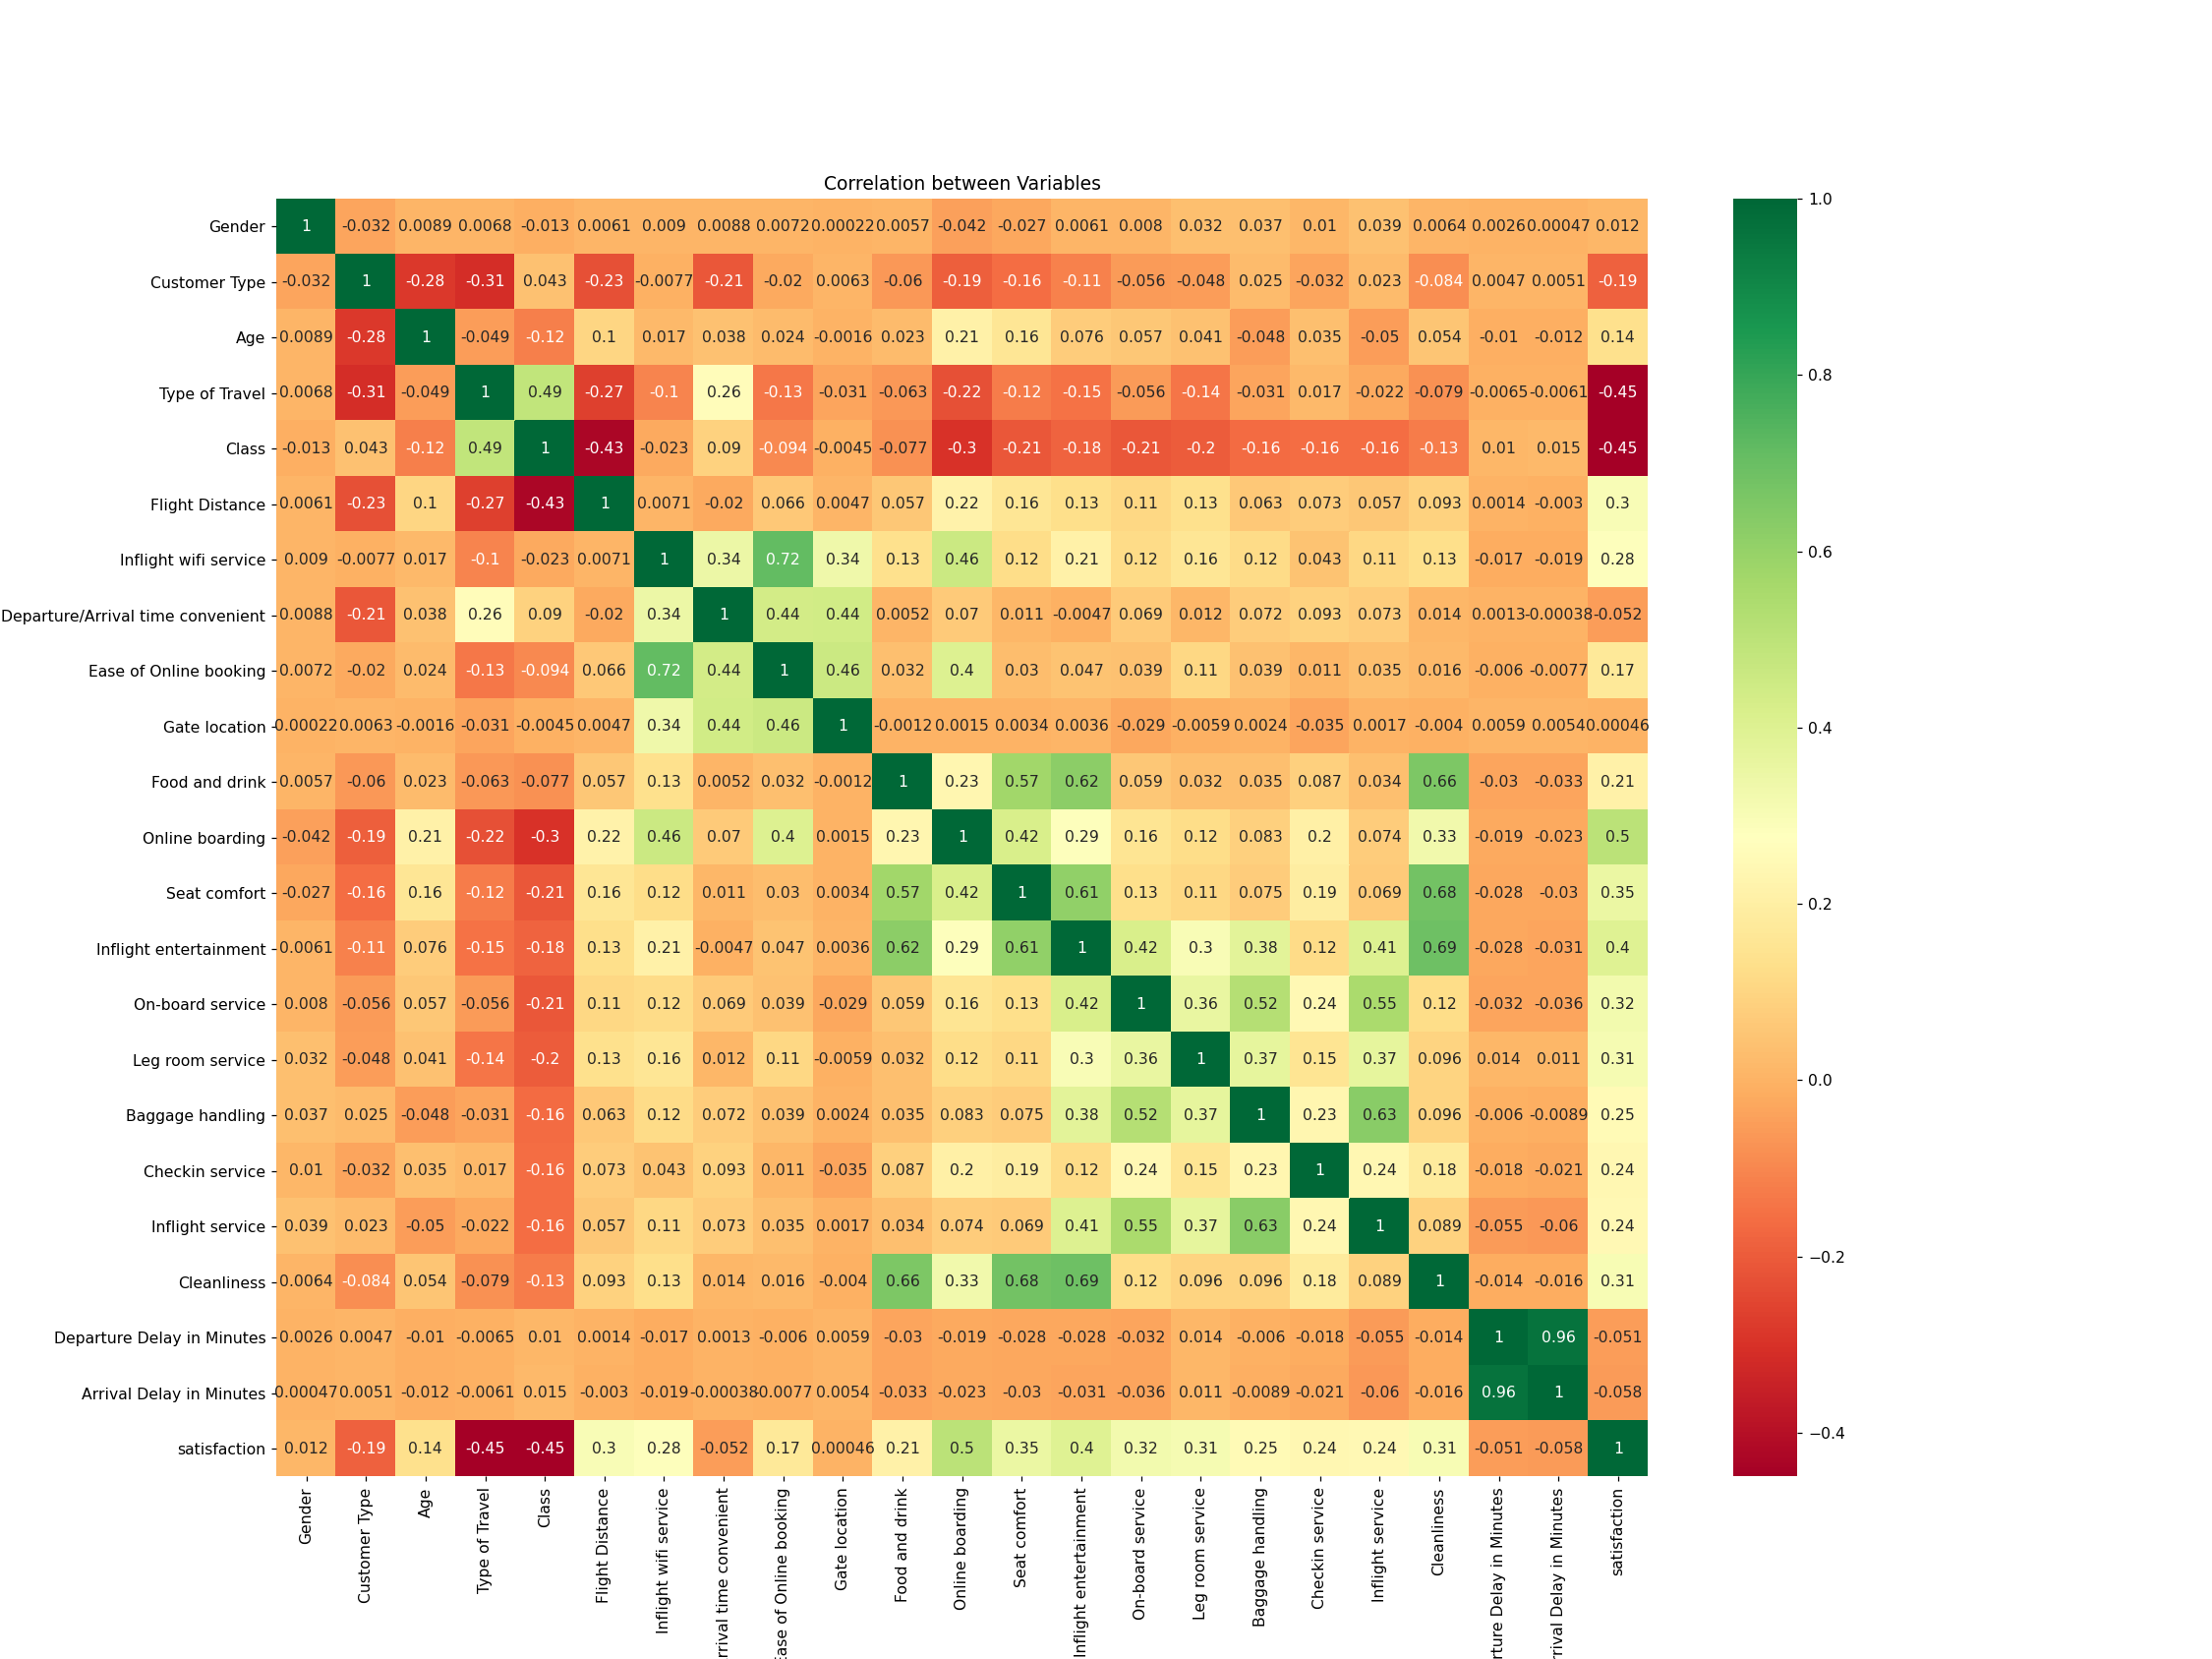

In [26]:
# Anem a veure les correlacions
import seaborn as sns
plt.figure(figsize=(20, 15))
sns.heatmap(train_dataset.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

In [27]:
# Anem a veure quines variables estan més correlacionades amb la nostra variable y ('satisfaction')
train_dataset.corr().abs()['satisfaction'].sort_values(ascending = False)

satisfaction                        1.000
Online boarding                     0.503
Class                               0.449
Type of Travel                      0.449
Inflight entertainment              0.398
Seat comfort                        0.349
On-board service                    0.322
Leg room service                    0.313
Cleanliness                         0.305
Flight Distance                     0.299
Inflight wifi service               0.284
Baggage handling                    0.248
Inflight service                    0.245
Checkin service                     0.236
Food and drink                      0.210
Customer Type                       0.188
Ease of Online booking              0.172
Age                                 0.137
Arrival Delay in Minutes            0.058
Departure/Arrival time convenient   0.052
Departure Delay in Minutes          0.051
Gender                              0.012
Gate location                       0.000
Name: satisfaction, dtype: float64

In [28]:
train_dataset

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0            1              0   13               1      2              460   
1            1              1   25               0      0              235   
2            0              0   26               0      0             1142   
3            0              0   25               0      0              562   
4            1              0   61               0      0              214   
...        ...            ...  ...             ...    ...              ...   
103899       0              1   23               0      1              192   
103900       1              0   49               0      0             2347   
103901       1              1   30               0      0             1995   
103902       0              1   22               0      1             1000   
103903       1              0   27               0      0             1723   

        Inflight wifi service  Departure/Arrival time convenient  \
0                           3                                  4   
1                           3                                  2   
2                           2                                  2   
3                           2                                  5   
4                           3                                  3   
...                       ...                                ...   
103899                      2                                  1   
103900                      4                                  4   
103901                      1                                  1   
103902                      1                                  1   
103903                      1                                  3   

        Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                            3              1  ...                       5   
1                            3              3  ...                       1   
2                            2              2  ...                       5   
3                            5              5  ...                       2   
4                            3              3  ...                       3   
...                        ...            ...  ...                     ...   
103899                       2              3  ...                       2   
103900                       4              4  ...                       5   
103901                       1              3  ...                       4   
103902                       1              5  ...                       1   
103903                       3              3  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
0                      5            5                          25   
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   

In [ ]:
# Anem a estandaritzar les dades

from sklearn.preprocessing import StandardScaler

